In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams.update({'axes.titlesize':16, 'axes.labelsize':14, 'xtick.labelsize':12, 'ytick.labelsize':12})

df = pd.read_csv("src/data/airbnb_madrid_clean_final.csv")

In [3]:
df = pd.read_csv("src/data/airbnb_madrid_clean_final.csv")
df

,host_response_time,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_score_mean,review_tier
0,within an hour,True,True,Sol,Entire rental unit,Entire home/apt,2,1.0,1.0,2.0,...,1,1,4.71,4.88,4.82,4.78,4.90,4.69,4.796667,Alta (4.5–4.8]
1,within an hour,True,True,Universidad,Entire rental unit,Entire home/apt,2,1.0,1.0,3.0,...,4,1,4.71,4.90,4.87,4.81,4.88,4.59,4.793333,Alta (4.5–4.8]
2,within an hour,True,True,Justicia,Private room in rental unit,Private room,4,1.5,1.0,2.0,...,41,4,4.78,4.46,4.80,4.86,4.97,4.60,4.745000,Alta (4.5–4.8]
3,within an hour,True,True,Universidad,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,...,1,0,4.49,4.42,4.43,4.40,4.60,4.09,4.405000,Media (4.0–4.5]
4,within an hour,True,True,Universidad,Entire rental unit,Entire home/apt,2,1.0,1.0,2.0,...,2,0,4.65,4.55,4.80,4.71,4.87,4.10,4.613333,Alta (4.5–4.8]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15020,within an hour,True,True,Almenara,Private room in rental unit,Private room,2,1.0,1.0,1.0,...,2,2,5.00,5.00,5.00,5.00,5.00,5.00,5.000000,Excelente (>4.8)
15021,within an hour,True,True,Palacio,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,...,4,4,5.00,5.00,5.00,5.00,5.00,5.00,5.000000,Excelente (>4.8)
15022,within an hour,True,True,San Diego,Entire rental unit,Entire home/apt,6,1.0,2.0,4.0,...,1,1,5.00,5.00,5.00,5.00,5.00,5.00,5.000000,Excelente (>4.8)
15023,within an hour,False,True,Apostol Santiago,Private room in rental unit,Private room,2,0.5,1.0,1.0,...,1,1,5.00,5.00,5.00,5.00,5.00,5.00,5.000000,Excelente (>4.8)


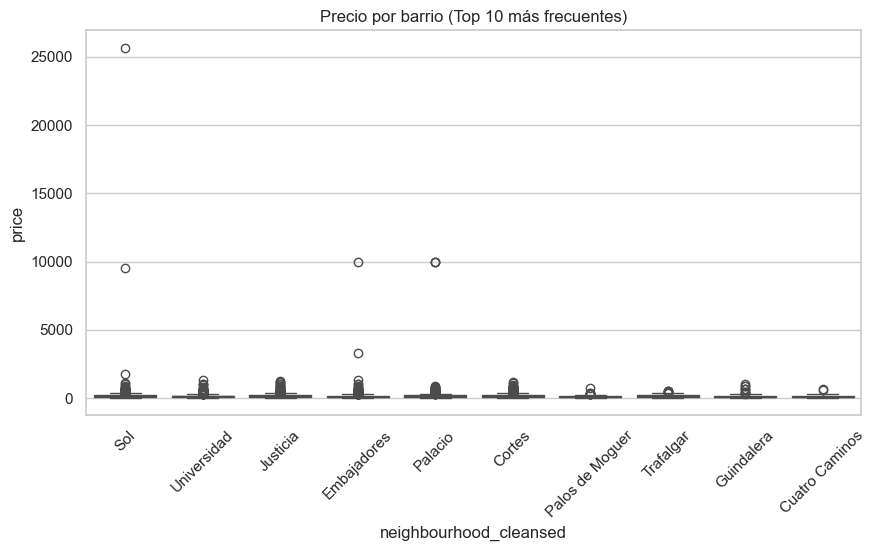

In [7]:
# ¿Hay diferencias de precio entre barrios?

top_neigh = df['neighbourhood_cleansed'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.boxplot(
    data=df[df['neighbourhood_cleansed'].isin(top_neigh)],
    x='neighbourhood_cleansed',
    y='price'
)
plt.title('Precio por barrio (Top 10 más frecuentes)')
plt.xticks(rotation=45)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3944\4255913574.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


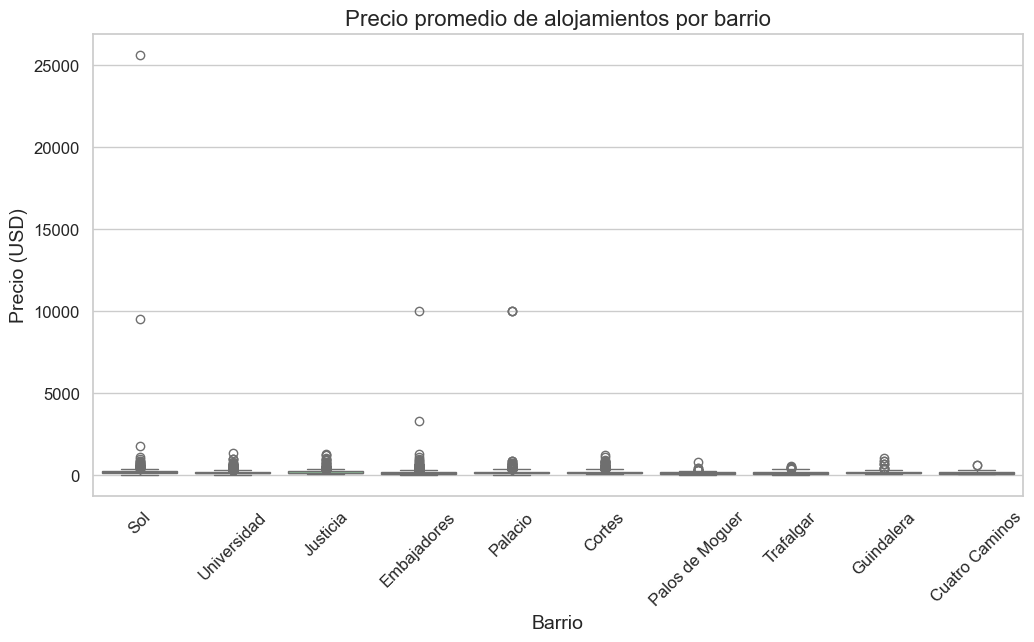

In [17]:
top_neigh = df['neighbourhood_cleansed'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df[df['neighbourhood_cleansed'].isin(top_neigh)],
    x='neighbourhood_cleansed',
    y='price',
    palette='pastel'
)
plt.title('Precio promedio de alojamientos por barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45)
plt.show()


# Los barrios mas caros son los que tienen las cajas mas altas

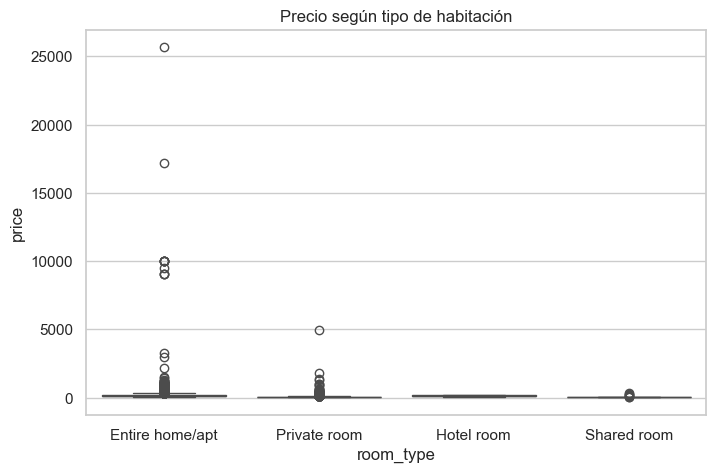

In [8]:
# ¿Cómo cambia el precio según el tipo de habitación?

plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='room_type',
    y='price'
)
plt.title('Precio según tipo de habitación')
plt.show()

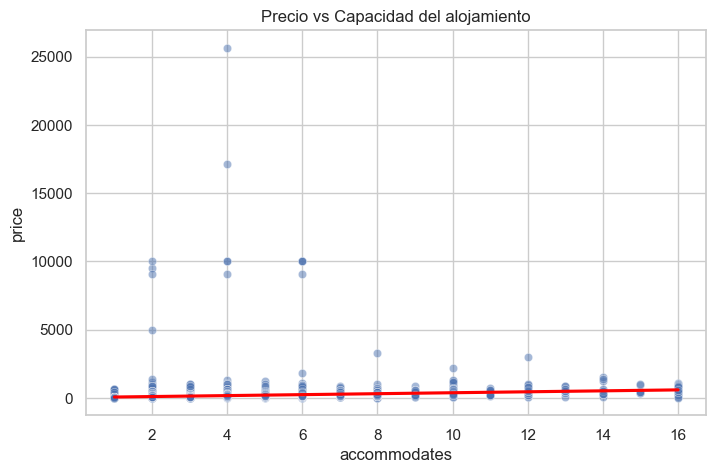

In [10]:
# ¿Los alojamientos con mayor capacidad (accommodates) tienen un precio más alto?

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='accommodates',
    y='price',
    alpha=0.5
)
sns.regplot(
    data=df,
    x='accommodates',
    y='price',
    scatter=False,
    color='red'
)
plt.title('Precio vs Capacidad del alojamiento')
plt.show()

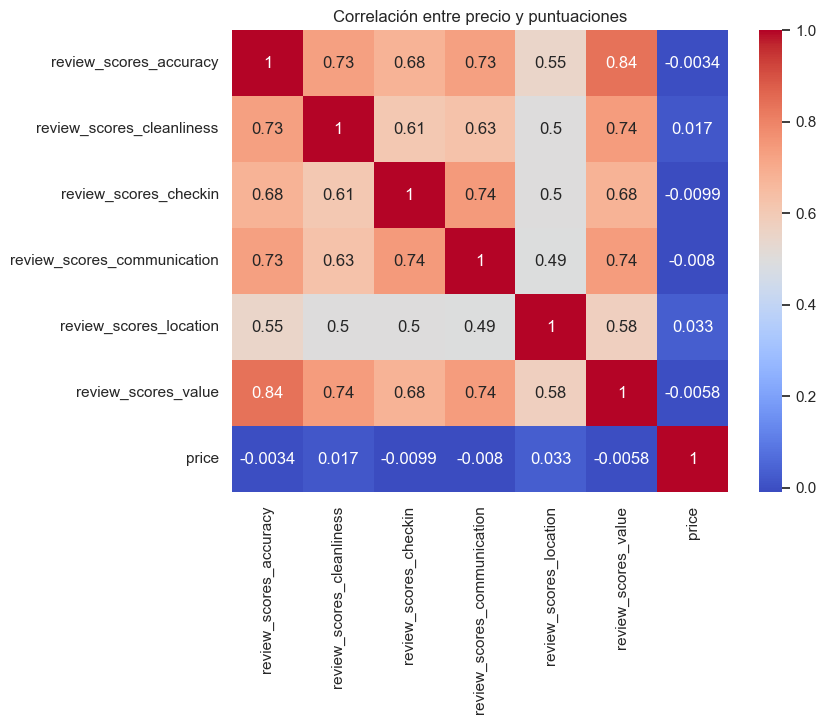

In [11]:
#  ¿Un precio alto implica mejores puntuaciones?

review_cols = [
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value'
]

plt.figure(figsize=(8,6))
sns.heatmap(
    df[review_cols + ['price']].corr(),
    annot=True, cmap='coolwarm'
)
plt.title('Correlación entre precio y puntuaciones')
plt.show()

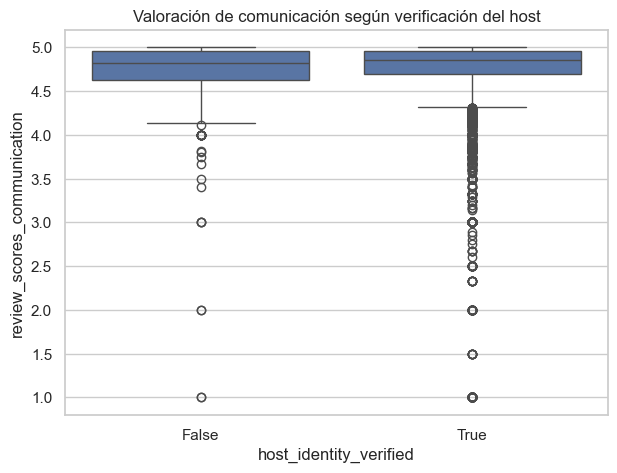

In [12]:
#  ¿Los anfitriones con perfil verificado reciben mejores valoraciones?

plt.figure(figsize=(7,5))
sns.boxplot(
    data=df,
    x='host_identity_verified',
    y='review_scores_communication'
)
plt.title('Valoración de comunicación según verificación del host')
plt.show()

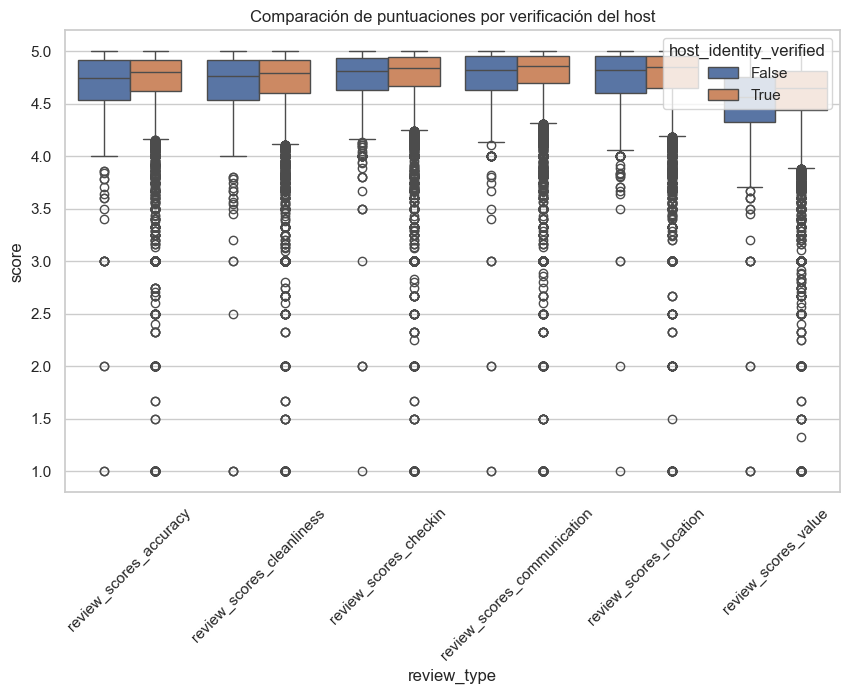

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df.melt(id_vars=['host_identity_verified'], value_vars=review_cols, 
                 var_name='review_type', value_name='score'),
    x='review_type',
    y='score',
    hue='host_identity_verified'
)
plt.title('Comparación de puntuaciones por verificación del host')
plt.xticks(rotation=45)
plt.show()

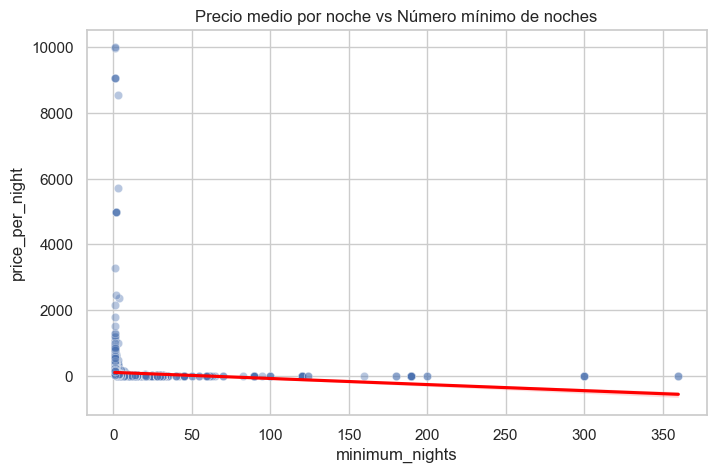

In [14]:
#  ¿A mayor número de noches el precio medio por noche es inferior?

# Precio medio por noche
df['price_per_night'] = df['price'] / df['minimum_nights']

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df[df['minimum_nights'] < 365],  # filtramos valores extremos
    x='minimum_nights',
    y='price_per_night',
    alpha=0.4
)
sns.regplot(
    data=df[df['minimum_nights'] < 365],
    x='minimum_nights',
    y='price_per_night',
    scatter=False,
    color='red'
)
plt.title('Precio medio por noche vs Número mínimo de noches')
plt.show()